In [13]:
# import packages
import glob
import mne 
import numpy as np

In [14]:
# Get a list of the evoked files
evoked_files = glob.glob('data/training/*-evoked.fif')

# Initialize empty lists to store the Evoked data
real_evokeds = []
ai_evokeds = []

# Loop over the files
for filename in evoked_files:
    # Read the 'Real_Human' Evoked instance from the file
    try:
        real_evoked = mne.read_evokeds(filename, condition='Real_Human')
        real_evokeds.append(real_evoked)
    except ValueError:
        pass  # No 'Real_Human' condition in this file

    # Read the 'AI_Human' Evoked instance from the file
    try:
        ai_evoked = mne.read_evokeds(filename, condition='AI_Human')
        ai_evokeds.append(ai_evoked)
    except ValueError:
        pass  # No 'AI_Human' condition in this file

Reading /Users/Kya_Masoumi/git/myGitHub/EyeSpy/EyeSpy-AI/data/training/p005-evoked.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms (Real_Human)
        0 CTF compensation matrices available
        nave = 1 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] s)
Reading /Users/Kya_Masoumi/git/myGitHub/EyeSpy/EyeSpy-AI/data/training/p005-evoked.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms (AI_Human)
        0 CTF compensation matrices available
        nave = 1 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] s)
Reading /Users/Kya_Masoumi/git/myGitHub/EyeSpy/EyeSpy-AI/data/training/p002-evoked.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms (Real_Human)
        0

/var/folders/sw/y3sc5j8d2dl97cljf2crjcgm0000gn/T/ipykernel_47347/3135502473.py:12: RuntimeWarning: This filename (/Users/Kya_Masoumi/git/myGitHub/EyeSpy/EyeSpy-AI/data/training/p005-evoked.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  real_evoked = mne.read_evokeds(filename, condition='Real_Human')
/var/folders/sw/y3sc5j8d2dl97cljf2crjcgm0000gn/T/ipykernel_47347/3135502473.py:19: RuntimeWarning: This filename (/Users/Kya_Masoumi/git/myGitHub/EyeSpy/EyeSpy-AI/data/training/p005-evoked.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  ai_evoked = mne.read_evokeds(filename, condition='AI_Human')
/var/folders/sw/y3sc5j8d2dl97cljf2crjcgm0000gn/T/ipykernel_47347/3135502473.py:12: RuntimeWarning: This filename (/Users/Kya_Masoumi/git/myGitHub/EyeSpy/EyeSpy-AI/data/training/p002-evoked.fif) does not conform to MNE naming conventio

In [15]:
print(len(real_evokeds))
print(len(ai_evokeds))

6
6


More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"


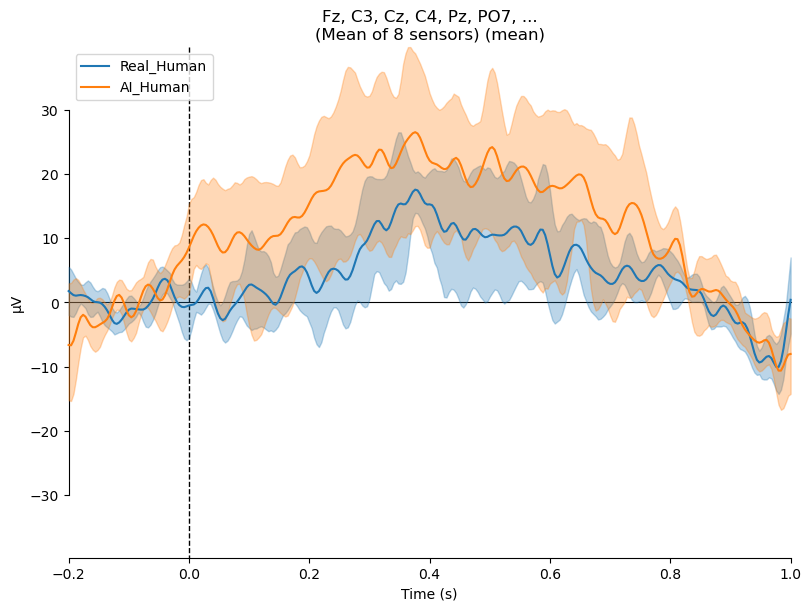

[<Figure size 800x600 with 1 Axes>]

In [16]:
# plot the average of the real and ai epochs
evokeds = dict(Real_Human=real_evokeds, AI_Human=ai_evokeds)
picks = ['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8']
mne.viz.plot_compare_evokeds(evokeds, picks=picks, combine="mean")

Identifying common channels ...
<Evoked | 'Grand average (n = 6)' (average, N=6), -0.2 – 1 s, baseline -0.2 – 0 s, 8 ch, ~36 kB>


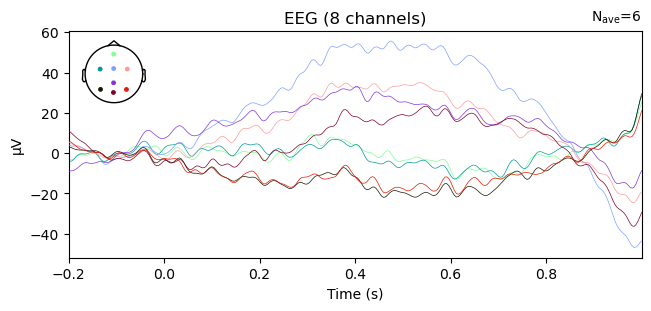

In [17]:
# compute the grand average of the real and ai epochs
grand_average = mne.grand_average(real_evokeds, ai_evokeds)
print(grand_average)
g_a_plot = grand_average.plot(picks=picks)

In [18]:
# My attempt at a linear classifier
# Unconvential imports go here:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [19]:
# prepare data for the classifier
# Extract the data from each Evoked object
real_data = [evoked.data for evoked in real_evokeds]
ai_data = [evoked.data for evoked in ai_evokeds]

# Combine the data into a single list
epochs_data = real_data + ai_data

# Convert the list to a 3D array
X = np.array(epochs_data)

# Reshape the data to 2D
n_instances, n_channels, n_times = X.shape
X_2d = X.reshape(n_instances, n_channels * n_times)

In [20]:
# Create labels for the real_evokeds and ai_evokeds conditions
real_labels = [0] * len(real_evokeds)  # '0' for real_evokeds
ai_labels = [1] * len(ai_evokeds)  # '1' for ai_evokeds

# Combine the labels into a single list
labels = real_labels + ai_labels

# Convert the list to a 1D array
y = np.array(labels)

In [23]:
# use X_2d and y to train the classifier
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the classifier
clf = LinearSVC(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 100.00%


/Users/Kya_Masoumi/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
